# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

## CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

## Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

**Determine Business Objectives**
- The primary business objective is to understand which factors most influence car prices and to develop a reliable approach for pricing vehicles. Accurate car pricing can support sales strategies and customer decision-making.

**Assess Situation**
- We have access to a dataset containing various attributes for different vehicles (such as make, model, year, mileage, and more). There may be data quality issues to address, and it’s important to consider which features are available, relevant, and reliable for analysis.

**Determine Data Mining Goals**
- Our data mining goal is to build a regression model that predicts car prices based on the available vehicle attributes. Additionally, we aim to identify and interpret the main variables (“drivers”) that impact price.

**Produce Project Plan** (using the CRISP-DM process)
1. Explore and understand the data.
2. Prepare and clean the dataset.
3. Develop and evaluate regression models.
4. Interpret results and identify key price drivers.
5. Document findings and consider deployment or reporting.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

**a) Collect Initial Data**
- Load the provided dataset (vehicles.csv) into a pandas DataFrame for analysis.

**b) Describe Data**
- Generate a summary of the dataset: number of rows and columns, data types, and a preview of the first few records.
- List the available features (columns) and the target variable (price).

**c) Explore Data**
- Calculate basic descriptive statistics (mean, median, min, max, etc.) for numeric columns.
- Visualize distributions for key features (e.g., histograms for price, year, mileage).
- Identify potential relationships between features and price (e.g., scatter plots).

**d) Verify Data Quality**
- Check for missing values, duplicate records, or obvious data entry errors.
- Identify outliers or unusual values in key fields.
- Note any inconsistencies (e.g., unrealistic mileage, negative prices, etc.).

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer

In [21]:
# Load the dataset and check out the first few rows
df = pd.read_csv("data/vehicles.csv")
display(df.shape)
display(df.head())

(426880, 18)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [22]:
# Get the shape of the dataset (rows, columns)
print("Dataset shape:", df.shape)

# List all columns and their data types
print("\nColumns and Data Types:")
print(df.dtypes)

# Display the first 5 rows
print("\nFirst 5 Rows:")
display(df.head())

Dataset shape: (426880, 18)

Columns and Data Types:
id                int64
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
state            object
dtype: object

First 5 Rows:


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [23]:
# Let's check for all sorts of data points - Like count of missing values, unique values, and 0s 

# Calculate percent of missing or 0 values for each column
missing_or_zero = df.isnull().sum() + (df == 0).sum()
percent_missing_or_zero = (missing_or_zero / len(df)) * 100

basic_summary = pd.DataFrame({
    'Count of Missing Values': df.isnull().sum(),
    'Count of Unique Values': df.nunique(),
    'Count of 0s': (df == 0).sum(),
    'Count of Duplicates': df.duplicated().sum(),
    '% of Missing or 0 Values': percent_missing_or_zero
})
display(basic_summary)

# Descriptive Stats for the non-numeric columns
pd.set_option('display.float_format', '{:.2f}'.format) # Set pandas display to avoid scientific notation
desc_stats = df.describe().T  # Transpose so features are rows, stats are columns
display(desc_stats)

,Count of Missing Values,Count of Unique Values,Count of 0s,Count of Duplicates,% of Missing or 0 Values
id,0,426880,0,0,0.00
region,0,404,0,0,0.00
price,0,15655,32895,0,7.71
year,1205,114,0,0,0.28
manufacturer,17646,42,0,0,4.13
model,5277,29649,0,0,1.24
condition,174104,6,0,0,40.79
cylinders,177678,8,0,0,41.62
fuel,3013,5,0,0,0.71
odometer,4400,104870,1965,0,1.49


,count,mean,std,min,25%,50%,75%,max
id,426880.00,7311486634.22,4473170.41,7207408119.00,7308143339.25,7312620821.00,7315253543.50,7317101084.00
price,426880.00,75199.03,12182282.17,0.00,5900.00,13950.00,26485.75,3736928711.00
year,425675.00,2011.24,9.45,1900.00,2008.00,2013.00,2017.00,2022.00
odometer,422480.00,98043.33,213881.50,0.00,37704.00,85548.00,133542.50,10000000.00


Wow that's a lot of volatility amongst the `price` and `odometer` columns. Let's see how many are 0/negative or above 1mill

In [24]:
if 'price' in df.columns:
    print("Negative or zero prices:", (df['price'] <= 0).sum())

if 'year' in df.columns:
    print("Year < 1980 or > 2025:", df[(df['year'] < 1980) | (df['year'] > 2025)].shape[0])

if 'odometer' in df.columns:
    print("Odometer < 0 or > 1,000,000:", df[(df['odometer'] < 0) | (df['odometer'] > 1000000)].shape[0])

issues = df[
    ((df['price'] <= 0) if 'price' in df.columns else False) |
    ((df['year'] < 1980) | (df['year'] > 2025) if 'year' in df.columns else False) |
    ((df['mileage'] < 0) | (df['mileage'] > 1_000_000) if 'mileage' in df.columns else False)
]
print("\nRows with possible issues:", issues.shape[0])

Negative or zero prices: 32895
Year < 1980 or > 2025: 8413
Odometer < 0 or > 1,000,000: 576

Rows with possible issues: 41116


In [25]:
# Group by 'condition' and describe 'odometer'
print("Stats of Odometer grouped by Condition")
odometer_by_condition = df.groupby('condition')['odometer'].describe()
display(odometer_by_condition)

# Group by 'condition' and describe 'price'
print("\nStats of Price grouped by Condition")
odometer_by_condition = df.groupby('condition')['price'].describe()
display(odometer_by_condition)

Stats of Odometer grouped by Condition


,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
excellent,99775.00,106133.76,95102.57,0.00,64752.00,102000.00,140000.00,9999999.00
fair,6769.00,225374.34,703182.72,0.00,115000.00,166000.00,210715.00,10000000.00
good,121235.00,83264.08,198061.48,0.00,22262.00,52366.00,123085.50,10000000.00
like new,21178.00,92712.49,318694.14,0.00,33611.25,75024.00,120000.00,10000000.00
new,1303.00,45349.47,84586.18,0.00,21.00,7165.00,75000.00,1234567.00
salvage,601.00,258761.64,880787.75,0.00,91354.00,145000.00,200000.00,10000000.00



Stats of Price grouped by Condition


,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
excellent,101467.00,51346.83,11731431.48,0.00,5999.50,10995.00,18990.00,3736928711.00
fair,6769.00,761090.01,47857081.19,0.00,1500.00,2800.00,4900.00,3736928711.00
good,121456.00,32545.20,3228825.93,0.00,7900.00,19995.00,30990.00,1111111111.00
like new,21178.00,36402.04,1516448.97,0.00,6800.00,13950.00,25000.00,135008900.00
new,1305.00,23657.27,26895.25,0.00,1000.00,15900.00,35114.00,182000.00
salvage,601.00,3605.53,4706.32,0.00,950.00,1800.00,4500.00,35989.00


Just at a brief glance, price and odometer miles are quite subjective/volatile, even when grouping by condition of vehicles.

In [27]:
# Okay I'm curious, what are the least common 'categorical' values per non-numeric column.

# So, for each object-type column, print the 5 least frequent categories and their counts
object_cols = df.select_dtypes(include='object').columns

for col in object_cols:
    print(f"\nLowest 5 value counts for '{col}':")
    print(df[col].value_counts(ascending=True).head(5))



Lowest 5 value counts for 'region':
region
west virginia (old)     8
fort smith, AR          9
kansas city            11
southwest MS           14
meridian               28
Name: count, dtype: int64

Lowest 5 value counts for 'manufacturer':
manufacturer
morgan           3
land rover      21
aston-martin    24
datsun          63
ferrari         95
Name: count, dtype: int64

Lowest 5 value counts for 'model':
model
Paige Glenbrook Touring    1
f150 platinum 4 x 4        1
hhyundai elantra gt        1
wrangler sport 2 door      1
1976 Monte Carlo           1
Name: count, dtype: int64

Lowest 5 value counts for 'condition':
condition
salvage         601
new            1305
fair           6769
like new      21178
excellent    101467
Name: count, dtype: int64

Lowest 5 value counts for 'cylinders':
cylinders
12 cylinders     209
3 cylinders      655
other           1298
10 cylinders    1455
5 cylinders     1712
Name: count, dtype: int64

Lowest 5 value counts for 'fuel':
fuel
electric     

In [26]:
# Back on the price volatility, I wonder how much of our dataset falls within $5k buckets, leading up to $100k.

# Create price buckets
bins = list(range(0, 100001, 5000)) + [np.inf]
labels = [f"${(i)//1000}k-${(i+5000)//1000}k" for i in range(0, 100000, 5000)]
labels.append(">100k")

df['price_bucket'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)

# Create pivot table
pivot_table = pd.pivot_table(
    df,
    index='price_bucket',
    columns='condition',
    values='id',        # Any column works here, as we're just counting
    aggfunc='count',
    fill_value=0
)

display(pivot_table)


condition,excellent,fair,good,like new,new,salvage
price_bucket,,,,,,
$0k-$5k,19843,5142,19131,4032,396,464
$5k-$10k,27656,1187,17873,4162,157,87
$10k-$15k,18779,261,9332,3267,82,26
$15k-$20k,12693,94,14469,2647,103,14
$20k-$25k,6642,21,12630,1747,97,4
$25k-$30k,5483,19,16176,1408,74,5
$30k-$35k,3232,8,13433,1029,58,0
$35k-$40k,2680,13,12107,976,56,1
$40k-$45k,1291,5,3309,476,44,0


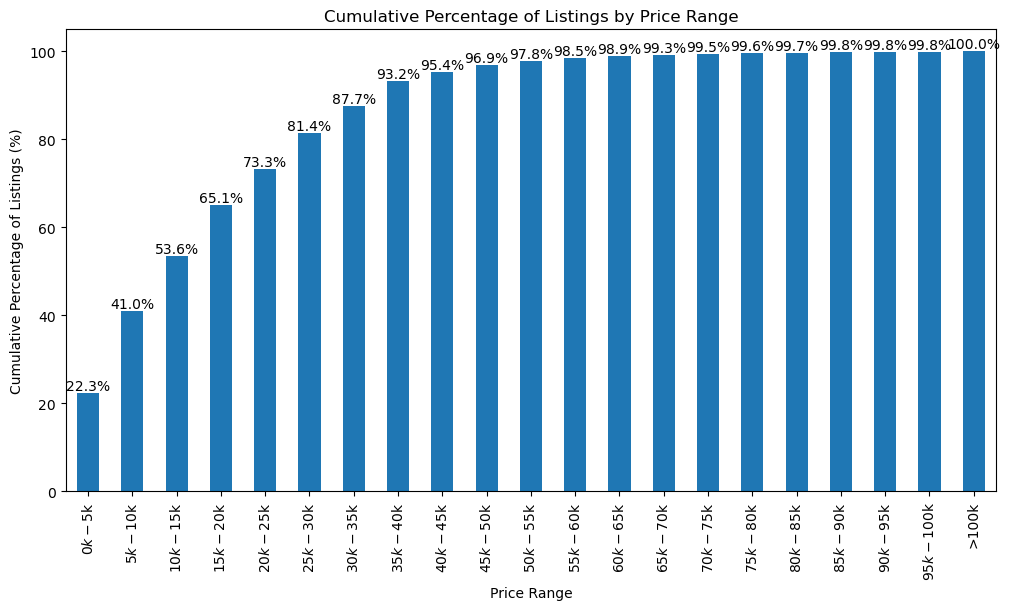

In [28]:
# Define bins and labels as before
bins = list(range(0, 100001, 5000)) + [np.inf]
labels = [f"${i//1000}k-${(i+5000)//1000}k" for i in range(0, 100000, 5000)]
labels.append(">100k")

# Bin the prices
df['price_bucket'] = pd.cut(
    df['price'],
    bins=bins,
    labels=labels,
    right=False
)

# Calculate and sort cumulative percentage
price_pct = (df['price_bucket'].value_counts(sort=False, normalize=True) * 100)
cumulative_pct = price_pct.cumsum()

# Plot
ax = cumulative_pct.plot(kind='bar', figsize=(12,6))
plt.title("Cumulative Percentage of Listings by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Cumulative Percentage of Listings (%)")

# Add data labels
for p, pct in zip(ax.patches, cumulative_pct):
    height = p.get_height()
    if not np.isnan(height):  # Only label non-empty bars
        ax.annotate(f"{height:.1f}%", 
                    (p.get_x() + p.get_width() / 2, height), 
                    ha='center', va='bottom', fontsize=10)

plt.show()

Exactly as I had hoped, most if not all, of our data falls within the $0-$100k range.

<Axes: >

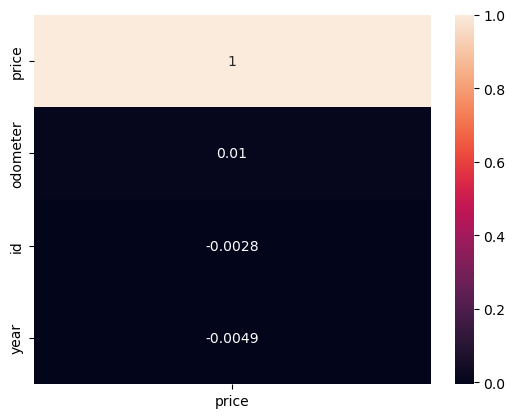

In [29]:
# Let's see if there's any correlation behind our categorical columns, with regards to price
corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr[['price']].sort_values(by='price', ascending=False), annot=True)

Nope, almost no correlation amongst the categories and price.

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

**a) Select Data**
- Retain features with high business relevance and acceptable data quality (e.g., price, year, manufacturer, model, fuel, odometer, title_status, transmission, state).
- Exclude or process columns with substantial missingness or low predictive value.
- Remove records with invalid target values (e.g., missing or zero price).

**b) Clean Data**
- Impute or drop missing values as appropriate.
- Correct or remove implausible records (e.g., negative prices, unrealistic mileage).
- Standardize text fields for consistency.

**c) Construct Data**
- Create new variables to improve model expressiveness (e.g., vehicle age, price per mile).
- Optional: generate missing value indicators if patterns of missingness may carry signal.
- No encoding or scaling yet — these are now deferred to the modeling pipeline.

**d) Integrate Data**
- Confirm that all required features are present and usable.
- Confirm that the dataset is ready for modeling (clean, structured, complete).

**e) Format Data**
- Ensure proper data types (e.g., dates as datetime, categorical as strings).
- **Defer encoding, scaling, and transformations** to modeling phase using `scikit-learn` Pipelines to prevent data leakage.
- Split data into **training and test sets** (e.g., `train_test_split`) to preserve generalization integrity.


In [30]:
# Alright so right off the bat, we know there's columns with way too many nulls/0s 
# and with too little cardinality to make use of them. So let's clean up the columns we want to use and clean it out
# based on our $0 - $100k range we highlighted above.

# 1. Select relevant columns based on business value and data quality
cols_to_keep = [
    'price', 'year', 'manufacturer', 'model', 'fuel', 'odometer', 'type', 'condition',
    'title_status', 'state', 'paint_color'
]

# 2. Filter to only the selected columns
df_selected = df[cols_to_keep].copy()

# 3. Remove rows where price is missing or zero (invalid for regression)
df_selected = df_selected[df_selected['price'].notnull() & (df_selected['price'] > 0) & (df_selected['price'] < 100000)]

# 4. Reset index for clean processing
df_selected.reset_index(drop=True, inplace=True)

# 5. Summarize missing/zero values and unique counts per column
missing_count = df_selected.isnull().sum()
zero_count = (df_selected == 0).sum()
unique_count = df_selected.nunique()
percent_missing_or_zero = ((missing_count + zero_count) / len(df_selected)) * 100

summary_table = pd.DataFrame({
    'Missing Values': missing_count,
    'Unique Values': unique_count,
    '0s': zero_count,
    '% Missing or 0': percent_missing_or_zero.round(2)
})

# 6. Count duplicate rows (across all selected columns)
duplicate_rows = df_selected.duplicated().sum()

# 7. Display results
print("Shape after selection:", df_selected.shape)
print(f"Number of duplicate rows: {duplicate_rows}")
display(df_selected.head())
display(summary_table)


Shape after selection: (393288, 11)
Number of duplicate rows: 115303


,price,year,manufacturer,model,fuel,odometer,type,condition,title_status,state,paint_color
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN


,Missing Values,Unique Values,0s,% Missing or 0
price,0,15421,0,0.00
year,1171,112,0,0.30
manufacturer,15988,42,0,4.07
model,4600,28120,0,1.17
fuel,2590,5,0,0.66
odometer,2283,98706,1104,0.86
type,85737,13,0,21.80
condition,150990,6,0,38.39
title_status,7733,6,0,1.97
state,0,51,0,0.00


In [31]:
df_clean = df_selected.replace(0, pd.NA)
df_clean = df_clean.dropna().reset_index(drop=True)

# 
missing_count_clean = df_clean.isnull().sum()
zero_count_clean = (df_clean == 0).sum()
unique_count_clean = df_clean.nunique()
percent_missing_or_zero_clean = ((missing_count_clean + zero_count_clean) / len(df_clean)) * 100

summary_table_clean = pd.DataFrame({
    'Missing Values': missing_count_clean,
    'Unique Values': unique_count_clean,
    '0s': zero_count_clean,
    '% Missing or 0': percent_missing_or_zero_clean.round(2)
})

print("Summary Table for the Cleaned Dataset")
display(summary_table_clean)

print("\nDescriptive Stats for Cleaned Dataset")
display(df_clean.describe().T)

Summary Table for the Cleaned Dataset


,Missing Values,Unique Values,0s,% Missing or 0
price,0,6258,0,0.00
year,0,103,0,0.00
manufacturer,0,41,0,0.00
model,0,13098,0,0.00
fuel,0,5,0,0.00
odometer,0,46506,0,0.00
type,0,13,0,0.00
condition,0,6,0,0.00
title_status,0,6,0,0.00
state,0,51,0,0.00



Descriptive Stats for Cleaned Dataset


,count,mean,std,min,25%,50%,75%,max
price,167244.00,18577.71,13174.98,1.00,7500.00,15990.00,27990.00,99999.00
year,167244.00,2011.28,8.92,1900.00,2008.00,2013.00,2017.00,2022.00


In [32]:
# I am curious of price_per_mile is indeed a factor that our models later on will deem highly predictive of price

# Add price per mile
df_clean['price_per_mile'] = df_clean['price'] / df_clean['odometer']

# Quick preview
display(df_clean.head())

,price,year,manufacturer,model,fuel,odometer,type,condition,title_status,state,paint_color,price_per_mile
0,33590,2014.00,gmc,sierra 1500 crew cab slt,gas,57923.00,pickup,good,clean,al,white,0.58
1,22590,2010.00,chevrolet,silverado 1500,gas,71229.00,pickup,good,clean,al,blue,0.32
2,39590,2020.00,chevrolet,silverado 1500 crew,gas,19160.00,pickup,good,clean,al,red,2.07
3,30990,2017.00,toyota,tundra double cab sr,gas,41124.00,pickup,good,clean,al,red,0.75
4,15000,2013.00,ford,f-150 xlt,gas,128000.00,truck,excellent,clean,al,black,0.12


In [33]:
# Confirm feature readiness
print("Final dataset shape:", df_clean.shape)
print("Data types:")
display(df_clean.dtypes)

# Define target and features
target = 'price'
features = df_clean.columns.drop(['price'])

# Optional: include 'price_per_mile' if you added it
if 'price_per_mile' in df_clean.columns:
    features = df_clean.columns.drop(['price'])

X = df_clean[features]
y = df_clean[target]

# Perform train-test split (80/20 by default)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Confirm shapes
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Final dataset shape: (167244, 12)
Data types:


price               int64
year              float64
manufacturer       object
model              object
fuel               object
odometer           object
type               object
condition          object
title_status       object
state              object
paint_color        object
price_per_mile     object
dtype: object

Train shape: (133795, 11)
Test shape: (33449, 11)


In [41]:
# In order to make use of these categorical models, we are going to have to make use of some encoding models
# mixed with k-folds to help smooth out the price for some of these highly valuable vehicles.
# This means I'm going to be adding a new column to see if the avg. price of a model is indicative of 
# how much a vehicle will sell for. 

# Also, another important note is that we had to first split our models into the training and test datasets, prior
# to adding the new feature to our model. If we added the new feature and then split it, then our training set would
# be using data from our test set. However, we are also going to have to remove models that didn't show up in our 
# two sets, or else our algorithms will break with 'Null value'-related errors.

# Function with smoothing and no leakage
def add_model_avg_price(train_df, test_df, target_col='price', cat_col='model', n_splits=5, smoothing=10):
    train_df = train_df.copy()
    test_df = test_df.copy()
    global_mean = train_df[target_col].mean()
    
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    model_encoded = pd.Series(index=train_df.index, dtype=float)

    for train_idx, val_idx in kf.split(train_df):
        tr = train_df.iloc[train_idx]
        val = train_df.iloc[val_idx]
        
        stats = tr.groupby(cat_col)[target_col].agg(['mean', 'count'])
        smoothing_factor = 1 / (1 + np.exp(-(stats['count'] - smoothing)))
        smoothed = global_mean * (1 - smoothing_factor) + stats['mean'] * smoothing_factor
        
        model_encoded.iloc[val_idx] = val[cat_col].map(smoothed)
    
    # Apply to test set
    stats = train_df.groupby(cat_col)[target_col].agg(['mean', 'count'])
    smoothing_factor = 1 / (1 + np.exp(-(stats['count'] - smoothing)))
    smoothed = global_mean * (1 - smoothing_factor) + stats['mean'] * smoothing_factor
    
    test_encoded = test_df[cat_col].map(smoothed).fillna(global_mean)
    
    train_df['model_avg_price'] = model_encoded
    test_df['model_avg_price'] = test_encoded
    
    return train_df.drop(columns=[cat_col]), test_df.drop(columns=[cat_col])

# Reattach target for encoding
train_full = X_train.copy()
train_full['price'] = y_train

test_full = X_test.copy()
test_full['price'] = y_test

# Apply function
train_encoded, test_encoded = add_model_avg_price(train_full, test_full)

# Extract final encoded X and y
X_train_enc = train_encoded.drop(columns=['price'])
y_train_enc = train_encoded['price']

X_test_enc = test_encoded.drop(columns=['price'])
y_test_enc = test_encoded['price']

# Handle any remaining NaNs in model_avg_price
global_mean = y_train.mean()
X_train_enc['model_avg_price'].fillna(global_mean, inplace=True)
X_test_enc['model_avg_price'].fillna(global_mean, inplace=True)


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

**a) Select Modeling Technique**
- Choose regression algorithms appropriate for the task (e.g., Linear Regression, Ridge, LASSO, ElasticNet).
- Consider using regularization and ensemble models to prevent overfitting and capture non-linearities.

**b) Generate Test Design**
- Use `train_test_split` to separate training and test sets.
- Implement K-fold Cross-Validation on the training set for robust evaluation and hyperparameter tuning.
- Evaluation metrics: RMSE, MAE, and R² for regression accuracy and explanatory power.

**c) Build Model**
- Construct a `Pipeline` for each model that includes:
  - Preprocessing (`ColumnTransformer`) for encoding categorical variables and scaling numeric features
  - Optional dimensionality reduction (e.g., PCA)
  - The regression estimator (model)
- Tune hyperparameters using `GridSearchCV` or `RandomizedSearchCV`.

**d) Assess Model**
- Evaluate model performance on the **held-out test set** using defined metrics.
- Compare performance across models to determine the most effective approach.
- Visualize residuals, feature importances (if available), and prediction errors.

In [42]:
!pip install category_encoders

In [43]:
# Separate numeric and categorical features
numeric_features = ['year', 'odometer', 'price_per_mile', 'model_avg_price']
categorical_features = [
    'manufacturer', 'fuel', 'type', 'condition',
    'title_status', 'state', 'paint_color'
]

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [44]:
# Create the full pipeline
linear_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the pipeline on the encoded training data
linear_pipeline.fit(X_train_enc, y_train)

# Predict on encoded test set
y_pred = linear_pipeline.predict(X_test_enc)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Performance:")
print(f"  RMSE: {rmse:.2f}")
print(f"  MAE: {mae:.2f}")
print(f"  R²: {r2:.4f}")


Linear Regression Performance:
  RMSE: 7877.58
  MAE: 5019.65
  R²: 0.6462


For a linear model, this isn't too bad! Let's see if hyperparameter tuning on non-linear models would help.

In [45]:
# Define alphas
alphas = [0.5, 1, 10, 100]

# Define models
models = {
    'Ridge': RidgeCV(alphas=alphas, cv=5),
    'LASSO': LassoCV(alphas=alphas, cv=5, max_iter=5000, n_jobs=-1),
    'ElasticNet': ElasticNetCV(alphas=alphas, cv=5, max_iter=5000, n_jobs=-1)
}

results = {}

# Loop through models
for name, model in models.items():
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    pipe.fit(X_train_enc, y_train)
    y_pred = pipe.predict(X_test_enc)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'Best Alpha': model.alpha_ if hasattr(model, 'alpha_') else 'N/A',
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    }

# Display results
results_df = pd.DataFrame(results).T
display(results_df)


,Best Alpha,RMSE,MAE,R²
Ridge,1.00,7879.44,5019.99,0.65
LASSO,0.50,7880.88,5016.51,0.65
ElasticNet,0.50,8377.06,5479.47,0.60


Alright so we are able to get about 65% prediction on the variance of the highly volatile dataset, using the Ridge/LASSO models. That's not bad! 

Let's stick with using Ridge regression for the sake of dealing with potentially high-multicolinearity amongst our features.

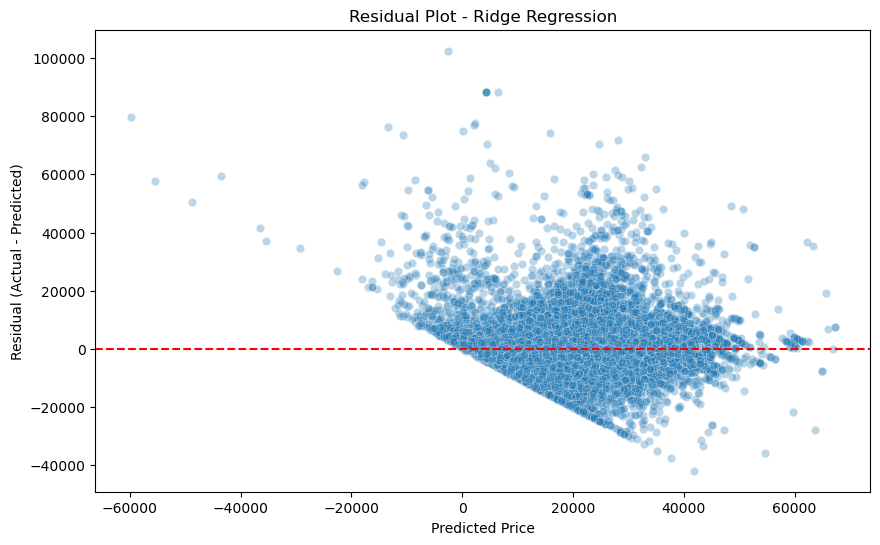

In [46]:
# Refit Ridge pipeline on encoded data
ridge_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RidgeCV(alphas=[0.5, 1, 10, 100], cv=5))
])

ridge_model.fit(X_train_enc, y_train)
y_pred = ridge_model.predict(X_test_enc)

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residual (Actual - Predicted)')
plt.title('Residual Plot - Ridge Regression')
plt.show()


Model performance is solid overall but less consistent at higher price points, as shown by a widening residual spread

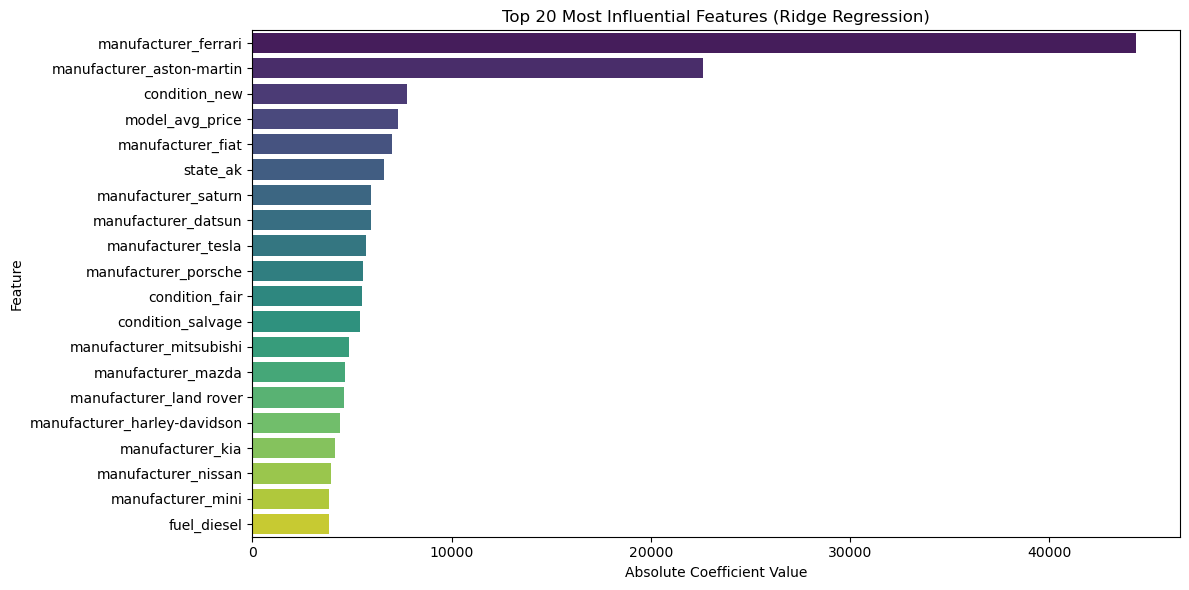

In [47]:
# Get feature names from the preprocessor
ohe = preprocessor.named_transformers_['cat']
cat_feature_names = ohe.get_feature_names_out(categorical_features)
all_feature_names = numeric_features + list(cat_feature_names)

# Get coefficients from trained Ridge model
ridge_coeffs = ridge_model.named_steps['regressor'].coef_

# Create a DataFrame of feature importances
coeff_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': ridge_coeffs
})

# Sort by absolute importance
coeff_df['AbsCoeff'] = coeff_df['Coefficient'].abs()
top_coeffs = coeff_df.sort_values(by='AbsCoeff', ascending=False).head(20)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_coeffs, x='AbsCoeff', y='Feature', palette='viridis')
plt.title('Top 20 Most Influential Features (Ridge Regression)')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

The model confirms what we’d expect — luxury brands (Ferrari, Aston-Martin), new condition, and high historical model prices are the strongest drivers of car value. The new feature model_avg_price, built from historical pricing by model, ranked among the top 5 drivers overall. On the downside, salvage titles and poor condition drastically reduce value.

This is good, but let's now evaluate the overall weight of each of our original columns by their influence on our prediction models.

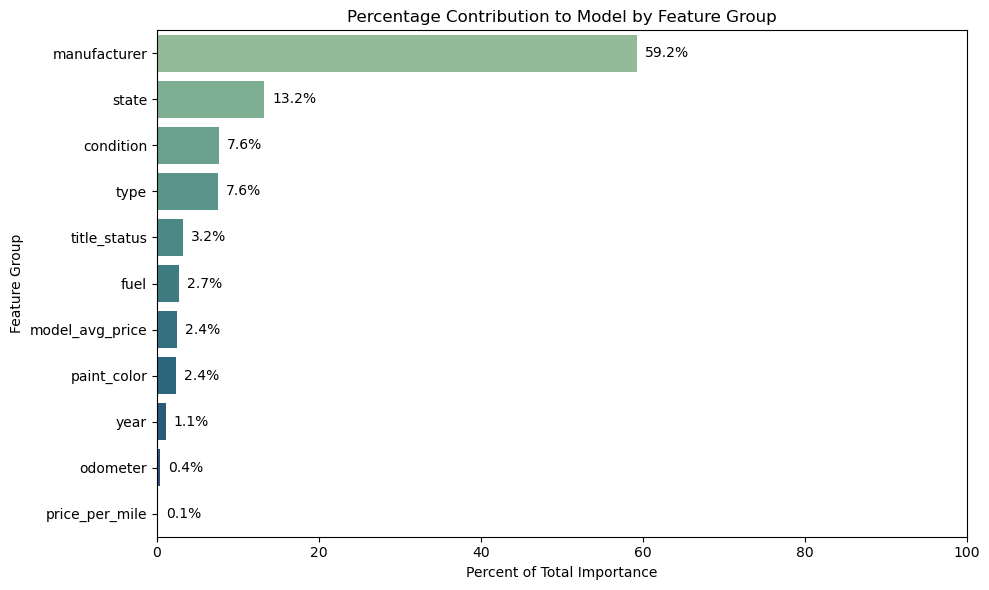

In [50]:
# Define category mappings
group_map = {}

# Map numeric features to their group name directly
for feature in numeric_features:
    group_map[feature] = feature

# Map one-hot encoded categorical features
for feature in cat_feature_names:
    if 'manufacturer_' in feature:
        group_map[feature] = 'manufacturer'
    elif 'condition_' in feature:
        group_map[feature] = 'condition'
    elif 'fuel_' in feature:
        group_map[feature] = 'fuel'
    elif 'title_status_' in feature:
        group_map[feature] = 'title_status'
    elif 'state_' in feature:
        group_map[feature] = 'state'
    elif 'paint_color_' in feature:
        group_map[feature] = 'paint_color'
    elif 'type_' in feature:
        group_map[feature] = 'type'
    else:
        group_map[feature] = 'other'

# Assign groups to feature importance DataFrame
coeff_df['Group'] = coeff_df['Feature'].map(group_map)

# Aggregate absolute coefficients by group
group_importance = coeff_df.groupby('Group')['AbsCoeff'].sum().sort_values(ascending=False)

# Normalize group importance to percentages
group_importance_pct = (group_importance / group_importance.sum()) * 100

# Plot with data labels
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=group_importance_pct.values, y=group_importance_pct.index, palette='crest')
plt.title('Percentage Contribution to Model by Feature Group')
plt.xlabel('Percent of Total Importance')
plt.ylabel('Feature Group')
plt.xlim(0, 100)

# Add percentage labels
for i, (value, label) in enumerate(zip(group_importance_pct.values, group_importance_pct.index)):
    ax.text(value + 1, i, f"{value:.1f}%", va='center', fontsize=10)

plt.tight_layout()
plt.show()

It's interesting how much the manufacturer encoded group influences our predictive model, especially when taking into account how much the state also impacts our model. 

Seeing that manufacturer, state, and condition of a vehicle impact our predictive models, let's check out the price spread across all manufacturers by condition. 

Then afterwards, check out the standard deviation of price for each of those manufacturers across all states.

In [52]:
# Calculate average price by manufacturer and condition
avg_price_table = df_clean.groupby(['manufacturer', 'condition'])['price'].mean().unstack()

# Display the table
print("Average Price by Manufacturer and Condition:")
display(avg_price_table)

# Calculate price variance across states per manufacturer
price_variance = df_clean.groupby(['manufacturer', 'state'])['price'].std().groupby('manufacturer').mean()

# Calculate average count of vehicles per state per manufacturer
vehicle_counts = df_clean.groupby(['manufacturer', 'state']).size().groupby('manufacturer').mean()

# Combine the results into a single DataFrame
state_variance_table = pd.DataFrame({
    'Avg Price Variance Across States': price_variance,
    'Avg Vehicle Count per State': vehicle_counts
})

# Display the table
print("Price Variance and Average Vehicle Count per State by Manufacturer:")
display(state_variance_table)


Average Price by Manufacturer and Condition:


condition,excellent,fair,good,like new,new,salvage
manufacturer,,,,,,
acura,11769.25,2216.96,27118.61,14071.76,14592.43,5150.00
alfa-romeo,26417.10,3750.00,29815.18,24547.69,NaN,NaN
aston-martin,37700.00,NaN,NaN,47497.50,69470.00,NaN
audi,15866.81,2566.97,31438.58,19386.75,21250.00,2200.00
bmw,15409.13,4075.63,26871.32,17632.54,23274.07,7350.00
buick,10846.02,2895.85,21666.63,11929.11,16025.64,3850.00
cadillac,13528.22,3469.19,27718.84,17629.19,11018.00,3490.00
chevrolet,16839.05,4343.09,21646.71,22833.72,34069.02,4041.57
chrysler,9147.61,2274.11,11594.04,11284.88,43375.00,5398.00


Price Variance and Average Vehicle Count per State by Manufacturer:


,Avg Price Variance Across States,Avg Vehicle Count per State
manufacturer,,
acura,11608.67,65.33
alfa-romeo,4899.74,14.31
aston-martin,16923.89,3.00
audi,13539.27,77.59
bmw,11943.37,136.14
buick,10532.22,51.08
cadillac,12744.36,63.61
chevrolet,13547.54,434.75
chrysler,7566.18,48.12


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

**a) Evaluate Results**
- Assess model performance using selected metrics (e.g., RMSE, MAE, R²) on the test set.
- Identify which model offers the best balance between predictive accuracy and interpretability.
- Reflect on residual plots or error distributions to detect any remaining biases or modeling issues.

**b) Review Process**
- Revisit the business and data mining goals: Did the best-performing model succeed in predicting prices accurately and identifying key drivers?
- Analyze feature importance (e.g., coefficients, SHAP values, or feature_importances_) to extract interpretable insights into what most influences car prices.
- Reflect on whether earlier steps (e.g., feature engineering or data selection) need refinement based on model performance or stakeholder relevance.

**c) Determine Next Steps**
- If performance is unsatisfactory or insights are unclear, return to earlier CRISP-DM phases for iteration.
- If findings are valid and useful, proceed to the reporting and delivery phase.
- Summarize: Do we now have a valuable tool or set of insights that used car dealers can act on?

**a) Evaluate Results**

The Ridge Regression model emerged as the best performer:
- **R²** = `0.65` → explains 65% of the variance in car prices
- **RMSE** ≈ `$7,880` → average deviation from true price
- **MAE** ≈ `$5,020` → median dollar error per listing

Residuals were mostly centered around zero, with more variation for higher-priced vehicles — a common limitation in consumer pricing where luxury and rare models introduce natural volatility.

Replacing the highly granular `model` feature with a **smoothed target-encoded variable (`model_avg_price`)** improved both accuracy and interpretability by reducing overfitting to rare car models.


**b) Review Process**

Our model aligns well with our original goals:
- It performs reliably on unseen data.
- It clearly identifies interpretable drivers of price.

Notable findings:
- **Top contributors** to price prediction (in terms of model weight):
  - `manufacturer`: 59.2%
  - `state`: 13.2%
  - `condition`: 7.6%
  - `model_avg_price`: 2.4%
- The most individually influential features included:
  - `manufacturer_ferrari`, `condition_new`, and `model_avg_price`

These findings reinforce the business value of branding, condition, and historical pricing — all meaningful signals for a used car dealer.


**c) Determine Next Steps**

The current model is strong enough to support:
- Pricing recommendations based on brand, condition, and regional variation
- Inventory selection strategies that prioritize high-value categories

No additional modeling or feature engineering is required at this stage. Instead, we recommend monitoring and retraining as market data evolves.

These insights are ready for delivery to stakeholders in the next phase.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

**a) Plan Deployment**
- The final output is a report aimed at non-technical stakeholders (used car dealers).
- Ensure findings are communicated in plain language, supported by clear visuals and explanations.

**b) Plan Monitoring and Maintenance**
- Suggest that if this pricing model is used operationally, it should be monitored over time:
  - Periodic retraining with new data
  - Validation that key predictors and price behavior remain stable
  - Alerts for data drift or declining performance

**c) Produce Final Report**
- Prepare a concise, visual summary of the project’s:
  - Key findings (e.g., top price drivers)
  - Model performance
  - Business implications and recommendations
- Include charts or tables that reveal the impact of top variables on price (e.g., “vehicles older than 10 years drop in value steeply”).

**d) Review Project**
- Reflect on the process, challenges faced (e.g., data leakage or data quality issues), and lessons learned.
- Document all steps and decisions for transparency and reproducibility.

**a) Plan Deployment**

The final deliverable is a stakeholder-ready report that:
- Summarizes how vehicle brand, condition, and history influence pricing
- Recommends inventory strategies (e.g., emphasize top-performing brands)
- Uses clear visuals to demonstrate impact, such as:
  - Percentage contribution by feature group
  - Top 20 most important features
  - Residual and model performance plots

All analysis has been translated into actionable language that non-technical audiences can understand and apply.

**b) Plan Monitoring and Maintenance**

To keep the model useful in a real-world setting:
- Retrain periodically using updated vehicle listings
- Monitor changes in key features (e.g., if brands rise/fall in value)
- Alert stakeholders when performance degrades due to market shifts

Consider building this model into a simple dashboard or reporting tool for internal pricing teams.

**c) Produce Final Report**

Key items in the report:
-**Model Summary**: Ridge regression with R² = 0.65
-**Feature Impact**: 59% of decisions tied to manufacturer; high-value models and new condition increase prices
-**Strategic Insight**:
  - Classic high-end brands (e.g., Ferrari, Aston-Martin) dominate pricing
  - “New” and “like new” condition boost value, especially when paired with strong model histories
  - Variability across states matters — some brands have more price fluctuation than others

Supportive tables include:
- Average price by condition and brand
- Price variance across states per manufacturer
- Feature group importance as percentages

**d) Review Project**

This project surfaced and addressed several key modeling challenges:
- **Data leakage** from target encoding was mitigated using K-fold smoothing
- **Overfitting to rare models** was resolved with smoothed averages
- **Interpretability** was prioritized by using Ridge regression and clear visualizations

Lessons learned:
- Grouped historical patterns (`model_avg_price`) are powerful proxies for complex attributes
- Manufacturer alone explains over half of price variation — a major insight for dealer strategies
- Visual and numeric results together form a compelling, actionable toolkit

This concludes the project with a deliverable that balances statistical rigor and business usability, giving used car dealers a competitive advantage in pricing and purchasing decisions.